# Analysis of Quality Negative Samples

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

ns_qual_analysis_dir = "output/NS_quality_analysis"

### Get a list with all available files with outsaved SNS/NSN minus distances

In [31]:
for f in set2:
    print(ns_qual_analysis_files[f])

output/NS_quality_analysis\ESNSRidle_cosine_similarity-20220725T150403Z-001\ESNSRidle_cosine_similarity\triple_10576_after_epoch_40.npz
output/NS_quality_analysis\ESNSRidle_cosine_similarity-20220725T150403Z-001\ESNSRidle_cosine_similarity\triple_106931_after_epoch_40.npz
output/NS_quality_analysis\ESNSRidle_cosine_similarity-20220725T150403Z-001\ESNSRidle_cosine_similarity\triple_134059_after_epoch_40.npz
output/NS_quality_analysis\ESNSRidle_cosine_similarity-20220725T150403Z-001\ESNSRidle_cosine_similarity\triple_345921_after_epoch_40.npz
output/NS_quality_analysis\ESNSRidle_cosine_similarity-20220725T150403Z-001\ESNSRidle_cosine_similarity\triple_481020_after_epoch_40.npz


In [2]:
ns_qual_analysis_files = glob(ns_qual_analysis_dir + "/*/*/*.npz", recursive=True)
ns_qual_analysis_files

['output/NS_quality_analysis\\ESNSRelaxed_jaccard_similarity-20220725T140537Z-001\\ESNSRelaxed_jaccard_similarity\\triple_10576_after_epoch_20.npz',
 'output/NS_quality_analysis\\ESNSRelaxed_jaccard_similarity-20220725T140537Z-001\\ESNSRelaxed_jaccard_similarity\\triple_10576_after_epoch_40.npz',
 'output/NS_quality_analysis\\ESNSRelaxed_jaccard_similarity-20220725T140537Z-001\\ESNSRelaxed_jaccard_similarity\\triple_10576_after_epoch_60.npz',
 'output/NS_quality_analysis\\ESNSRelaxed_jaccard_similarity-20220725T140537Z-001\\ESNSRelaxed_jaccard_similarity\\triple_106931_after_epoch_20.npz',
 'output/NS_quality_analysis\\ESNSRelaxed_jaccard_similarity-20220725T140537Z-001\\ESNSRelaxed_jaccard_similarity\\triple_106931_after_epoch_40.npz',
 'output/NS_quality_analysis\\ESNSRelaxed_jaccard_similarity-20220725T140537Z-001\\ESNSRelaxed_jaccard_similarity\\triple_106931_after_epoch_60.npz',
 'output/NS_quality_analysis\\ESNSRelaxed_jaccard_similarity-20220725T140537Z-001\\ESNSRelaxed_jaccard_

### Decide what to plot

In [139]:
set1_40 = [1,4,7,10,13]
set1_60 = [x+1 for x in set1_40]
set2_40 = [16, 19, 22, 25, 28]
set2_60 = [x+1 for x in set2_40]
set3=[]
curve_descriptions = ["ESNS (Jaccard similarity)", "ESNS with Ridle embedding (cosine similarity and raw reconstructed input)"]
plot_title = "Distribution of negative samples for five random triples of FB15k after 60 epochs"

### CCDF plot

#### Mean over sets

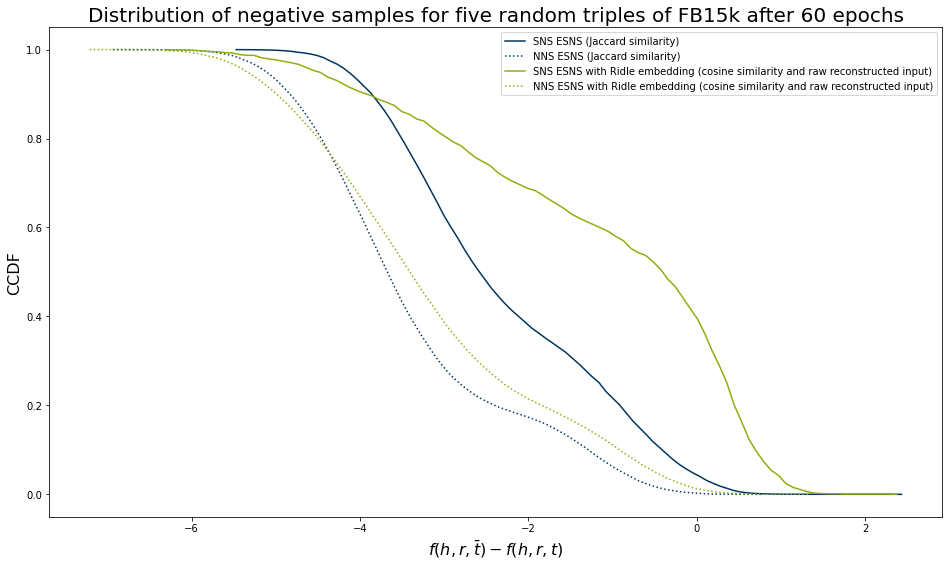

In [140]:
plt.figure(figsize=(16,9))
#colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
colors = ['#003560', '#8DAE10']
color_index = 0
for set in (set1_60, set2_60):
    sns, nns = [], []
    for f in set:
        minus_distances = dict(np.load(ns_qual_analysis_files[f]))
        sns += list(minus_distances['sns'])
        nns += list(minus_distances['nns'])
    
    count_sns, bins_count_sns = np.histogram(sns, bins=100)
    count_nns, bins_count_nns = np.histogram(nns, bins=100)

    pdf_sns = count_sns / sum(count_sns)
    pdf_nns = count_nns / sum(count_nns)

    cdf_sns = np.cumsum(pdf_sns)
    cdf_nns = np.cumsum(pdf_nns)

    plt.plot(bins_count_sns[1:], 1-cdf_sns, label="SNS {}".format(curve_descriptions[color_index]), color=colors[color_index])
    plt.plot(bins_count_nns[1:], 1-cdf_nns, label="NNS {}".format(curve_descriptions[color_index]), color=colors[color_index], linestyle="dotted")

    plt.legend()
    plt.title(plot_title, fontsize=20)
    plt.xlabel(r"$f(h, r, \bar{t}) - f(h, r, t)$", fontsize=16)
    plt.ylabel("CCDF", fontsize=16)

    color_index += 1

In [65]:
import matplotlib as mpl

#### For each entry in sets

Line2D(SNS ESNS (Jaccard similarity))
Line2D(SNS ESNS (Jaccard similarity))
Line2D(SNS ESNS (Jaccard similarity))
Line2D(SNS ESNS (Jaccard similarity))
Line2D(SNS ESNS (Jaccard similarity))
Line2D(SNS ESNS (Jaccard similarity))
Line2D(SNS ESNS (Jaccard similarity))
Line2D(SNS ESNS (Jaccard similarity))
Line2D(SNS ESNS (Jaccard similarity))
Line2D(SNS ESNS (Jaccard similarity))


Text(0.5, 0.98, 'Distribution of negative samples for five random triples of FB15k after 60 epochs')

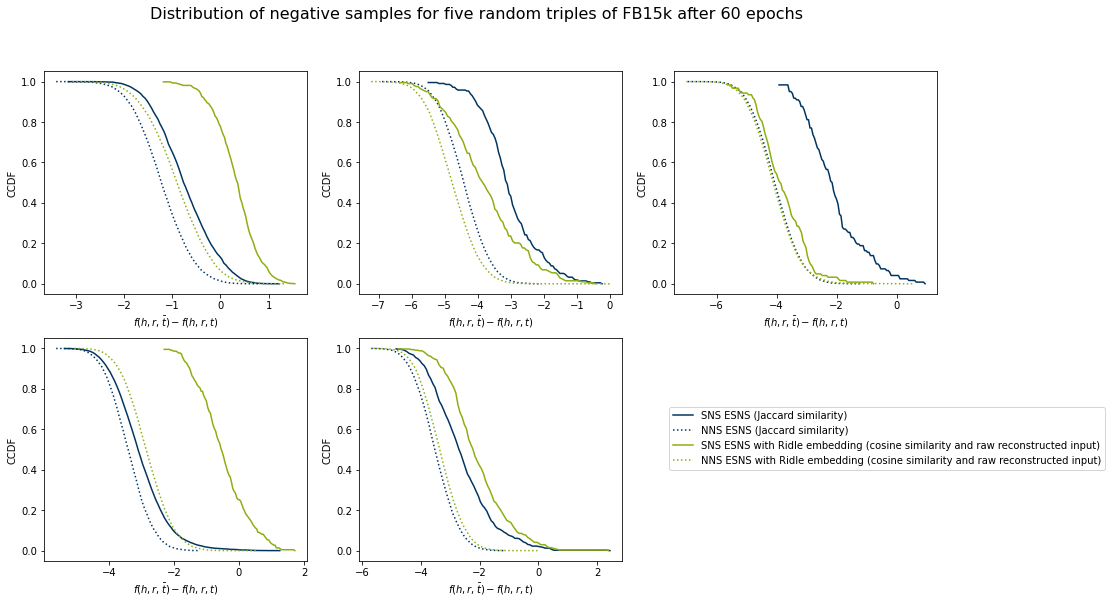

In [141]:
fig = plt.figure(figsize=(16,9))
spec = mpl.gridspec.GridSpec(ncols=3, nrows=2)
colors = ['#003560', '#8DAE10']

index = 0
color_index = 0
line1, line2 = [0,0], [0,0]
for set1, set2 in zip(set1_60, set2_60):
    ax = fig.add_subplot(spec[index // 3, index % 3])
    #print(index % 3)
    for f in (set1, set2):
        
        minus_distances = dict(np.load(ns_qual_analysis_files[f]))
        count_sns, bins_count_sns = np.histogram(minus_distances["sns"], bins=100)
        count_nns, bins_count_nns = np.histogram(minus_distances["nns"], bins=100)

        pdf_sns = count_sns / sum(count_sns)
        pdf_nns = count_nns / sum(count_nns)

        cdf_sns = np.cumsum(pdf_sns)
        cdf_nns = np.cumsum(pdf_nns)

        line1[color_index% len(colors)],  = ax.plot(bins_count_sns[1:], 1-cdf_sns, label="SNS {}".format(curve_descriptions[color_index % len(colors)]), color=colors[color_index % len(colors)])
        line2[color_index% len(colors)],  = ax.plot(bins_count_nns[1:], 1-cdf_nns, label="NNS {}".format(curve_descriptions[color_index % len(colors)]), color=colors[color_index % len(colors)], linestyle="dotted")
    	
        print(line1[0])
        #axs.flat[color_index].legend()
        #axs.flat[color_index].set_title(plot_title, fontsize=10)
        ax.set_xlabel(r"$f(h, r, \bar{t}) - f(h, r, t)$", fontsize=10)
        ax.set_ylabel("CCDF", fontsize=10)
        color_index += 1

    index += 1

fig.legend(handles=[line1[0], line2[0], line1[1], line2[1]],  bbox_to_anchor=(0.5,0.5, 0.55, -0.13))
fig.suptitle(plot_title, fontsize=16)